# Où suis-je ?

In [1]:
pwd()

"d:\\Users\\Administrator\\OneDrive\\Documents\\Julia\\FEM"

# Se positionner dans son répertoire de travail (dossier de téléchargement et/ou google drive)

In [2]:
cd("G:\\My Drive\\")

# Listing des paquets disponibles dans l'environnement actuel 
Si la librairie LibFEM est absente on peut utiliser les 2 commandes suivantes indiféremmen using Pkg;
Pkg.add(PackageSpec(url="https://github.com/amdeld/LibFEM.jl")) ou 
]add https://github.com/amdeld/LibFEM.jl
 

In [3]:
]st


Status `D:\Users\Administrator\OneDrive\Documents\Julia\FEM\Project.toml`
 [c601a237] Interact v0.10.3
  [3625dbae] LibFEM v0.1.0 `https://github.com/amdeld/LibFEM.jl#master`
  [91a5bcdd] Plots v1.6.3
  [0f1e0344] WebIO v0.8.15


# On charge ensuite la librairie LibFEM avec la commande suivante:

In [4]:
using LibFEM # ,Plots

# Quelques informations quant au cas à traiter

In [6]:
#PARAMETERS
const L=10000. #length in mm
const A=100. #cross-sectional area in mm^2
const E=210000. #modulus of elasticity in MPa [steel]
const FM=10000.; #force modulus in N

In [7]:
# ===============================================PRE-PROCESSING==================
# DEFINING AND DISCRETIZING[MESHING] THE STRUCTURE
# connectivity table
# elt||node_i||node_j
# 1|1|3
# 2|2|3
# grid()
X1pos=0.;Y1pos=0.
X2pos=0.;Y2pos=L
X3pos=L;Y3pos=L
#lengths
L1=d2_truss_elementlength(X1pos,Y1pos,X3pos,Y3pos) #length of element 1
L2=d2_truss_elementlength(X2pos,Y2pos,X3pos,Y3pos) #length of element 2
#APPLYING GEOMETRIC&MATERIAL PROPERTIES
A1=sqrt(2)*A; #cross-sectional area of element 1
A2=A; #cross-sectional area of element 2
E1=E; #material of element 1
E2=E; #material of element 2

# Calcul et Affichage des matrices de raideur élémentaires

In [8]:
#writing-defining the element stiffness matrices
K1=d2_truss_elementstiffness(E1,A1,L1,45);
println("K1=\r")
K1

K1=


4×4 Array{Float64,2}:
  1050.0   1050.0  -1050.0  -1050.0
  1050.0   1050.0  -1050.0  -1050.0
 -1050.0  -1050.0   1050.0   1050.0
 -1050.0  -1050.0   1050.0   1050.0

In [9]:
K2=d2_truss_elementstiffness(E2,A2,L2,0);
println("K2=\r")
K2

K2=


4×4 Array{Float64,2}:
  2100.0   0.0  -2100.0  -0.0
     0.0   0.0     -0.0  -0.0
 -2100.0  -0.0   2100.0   0.0
    -0.0  -0.0      0.0   0.0

# Affichage des matrices de raideurs positionnées $[K_1]^p$ $[K_2]^p$ et et de la matrice d'assemblage $[K]$

In [10]:
#ASSEMBLING THE GLOBAL STIFFNESS MATRIX
#matrices initialization
K=zeros(6,6);K1P=zeros(6,6);
#positionning stiffness matrices
K1P=d2_truss_assemble(K,K1,1,3)
println("K1P=\r")
K1P

K1P=


6×6 Array{Float64,2}:
  1050.0   1050.0  0.0  0.0  -1050.0  -1050.0
  1050.0   1050.0  0.0  0.0  -1050.0  -1050.0
     0.0      0.0  0.0  0.0      0.0      0.0
     0.0      0.0  0.0  0.0      0.0      0.0
 -1050.0  -1050.0  0.0  0.0   1050.0   1050.0
 -1050.0  -1050.0  0.0  0.0   1050.0   1050.0

In [11]:
K=zeros(6,6);K2P=zeros(6,6);
K2P=d2_truss_assemble(K,K2,2,3)
println("K2P=\r")
K2P

K2P=


6×6 Array{Float64,2}:
 0.0  0.0      0.0  0.0      0.0  0.0
 0.0  0.0      0.0  0.0      0.0  0.0
 0.0  0.0   2100.0  0.0  -2100.0  0.0
 0.0  0.0      0.0  0.0      0.0  0.0
 0.0  0.0  -2100.0  0.0   2100.0  0.0
 0.0  0.0      0.0  0.0      0.0  0.0

In [12]:
#assembling
K=K1P+K2P
println("K=\r")
K

K=


6×6 Array{Float64,2}:
  1050.0   1050.0      0.0  0.0  -1050.0  -1050.0
  1050.0   1050.0      0.0  0.0  -1050.0  -1050.0
     0.0      0.0   2100.0  0.0  -2100.0      0.0
     0.0      0.0      0.0  0.0      0.0      0.0
 -1050.0  -1050.0  -2100.0  0.0   3150.0   1050.0
 -1050.0  -1050.0      0.0  0.0   1050.0   1050.0

# Affichage des vecteurs des déplacements et des chargements nodaux

In [13]:
#SOLVING DISPACEMENT EQUATIONS
#extracting displacement submatrix via index vector
K_s=K[5:6,5:6]
#Setting-up the force subvector by applying Load & Boundary Conditions[LBC]]
F_s=[0, -FM]
#solving by gaussian elimination
U_s=K_s\F_s
#SOLVING FORCE EQUATIONS
#setting-up the global nodal displacement vector
U=[0, 0, 0, 0, U_s[1], U_s[2]]
println("U=\r")
U

U=


6-element Array{Float64,1}:
   0.0
   0.0
   0.0
   0.0
   4.761904761904763
 -14.28571428571429

In [14]:
#computing the global nodal force vector
F=K*U
println("F=\r")
F

F=


6-element Array{Float64,1}:
  10000.000000000002
  10000.0
 -10000.000000000002
      0.0
     -1.8189894035458565e-12
 -10000.0

# Calcul et Affichage des grandeurs dérivées déformations et contraintes élémentaires

In [15]:
#writing the element nodal displacement vectors
U1=[U[1], U[2], U[5], U[6]]
U2=[U[3], U[4], U[5], U[6]]
#computing element strains
ϵ1=d2_truss_elementstrain(L1,45,U1)
@show ϵ1
ϵ2=d2_truss_elementstrain(L2,0,U2)
@show ϵ2;

ϵ1 = [-0.00047619047619047624]
ϵ2 = [0.0004761904761904763]


In [16]:
#computing element forces
f1=d2_truss_elementforce(E1,A1,L1,45,U1)
@show f1
f2=d2_truss_elementforce(E2,A2,L2,0,U2)
@show f2;

f1 = [-14142.135623730956]
f2 = [10000.000000000002]


In [17]:
#computing element stresses
σ1=d2_truss_elementstress(E1,L1,45,U1)
@show σ1
σ2=d2_truss_elementstress(E2,L2,0,U2)
@show σ2;

σ1 = [-100.00000000000004]
σ2 = [100.00000000000001]


# Plot

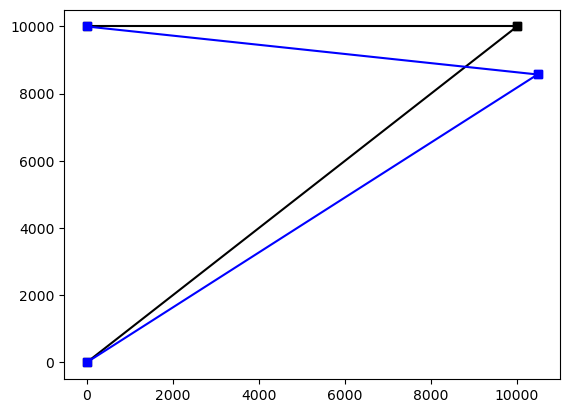

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000046956908>

In [18]:
using PyPlot
Xini=[X1pos, X3pos]
Yini=[Y1pos, Y3pos]
plot(Xini,Yini,"ks-")
Xini=[X2pos, X3pos]
Yini=[Y2pos, Y3pos]
plot(Xini,Yini,"ks-")
fampl=100
Xdef=[(X1pos+fampl*U[1]), (X3pos+fampl*U[5])]
Ydef=[(Y1pos+fampl*U[1]), (Y3pos+fampl*U[6])]
plot(Xdef,Ydef,"bs-")
Xdef=[(X2pos+fampl*U[3]), (X3pos+fampl*U[5])]
Ydef=[(Y2pos+fampl*U[4]), (Y3pos+fampl*U[6])]
plot(Xdef,Ydef,"bs-")